In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
data = pd.read_csv('../input/netflix-original-films-imdb-scores/NetflixOriginals.csv')

In [3]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [4]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [5]:
data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
data['Premiere'] = pd.to_datetime(data['Premiere'])

In [7]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [8]:
#The day of the week with Monday=0, Sunday=6.
import datetime
data['month'] = data['Premiere'].dt.month
data['year'] = data['Premiere'].dt.year
data['day'] = data['Premiere'].dt.dayofweek
data['date_day'] = data['Premiere'].dt.day
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30
...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8


In [9]:
#mapping months
Mmap = {1: 'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
data['month_map'] = data['month'].map(Mmap)
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,month_map
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5,Aug
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21,Aug
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26,Dec
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19,Jan
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30,Oct
...,...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31,Dec
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9,Oct
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16,Dec
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Dec


In [10]:
#mapping days of the week to data 
dmap = {0: 'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
data['day of week'] = data['day'].map(dmap)
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,month_map,day of week
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5,Aug,Mon
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21,Aug,Fri
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26,Dec,Thurs
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19,Jan,Fri
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30,Oct,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31,Dec,Mon
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9,Oct,Fri
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16,Dec,Sun
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Dec,Tues


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

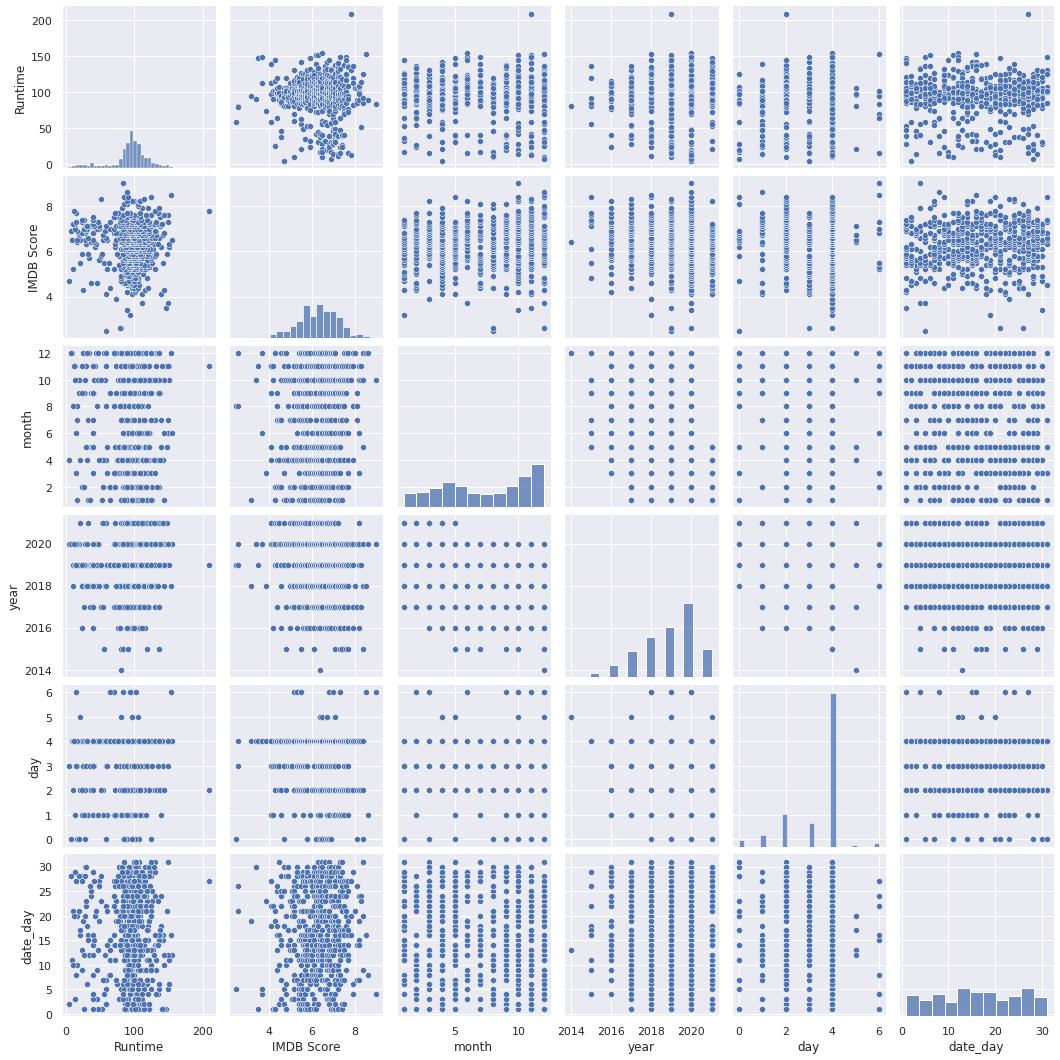

In [12]:
sns.pairplot(data)

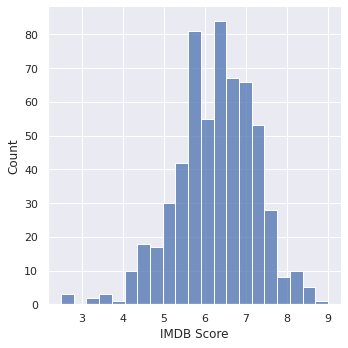

In [13]:
sns.displot(data['IMDB Score'])

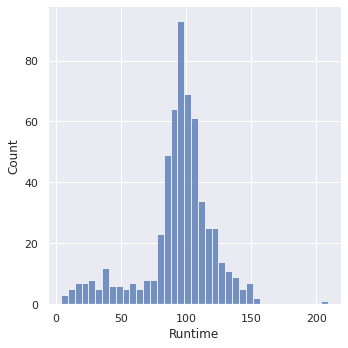

In [14]:
sns.displot(data['Runtime'])

<AxesSubplot:xlabel='day of week', ylabel='IMDB Score'>

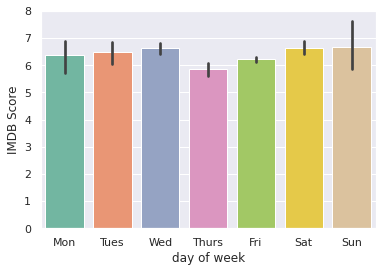

In [15]:
bar_order = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
sns.barplot(x='day of week',y= 'IMDB Score',data=data,palette='Set2',order=bar_order) 
#Movies reviews on wednesday have highest IMDB score with smallest standard error

<AxesSubplot:xlabel='year', ylabel='IMDB Score'>

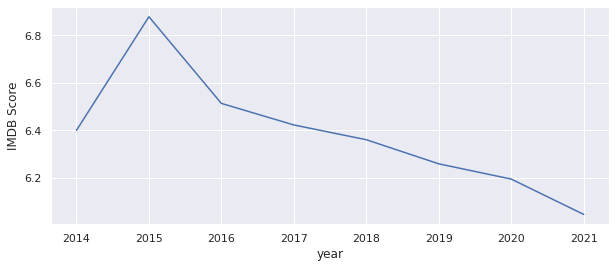

In [16]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year',y='IMDB Score',data=data,ci=None)

<AxesSubplot:xlabel='month_map', ylabel='IMDB Score'>

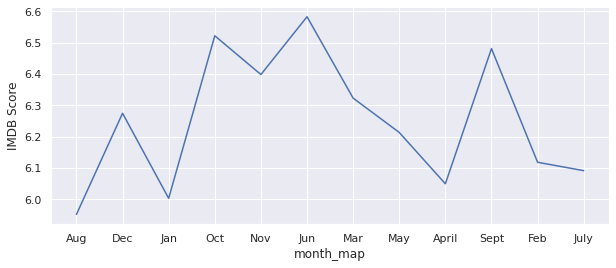

In [17]:
plt.figure(figsize=(10,4))
sns.lineplot(x='month_map',y='IMDB Score',data=data,ci=None)

<AxesSubplot:xlabel='year', ylabel='count'>

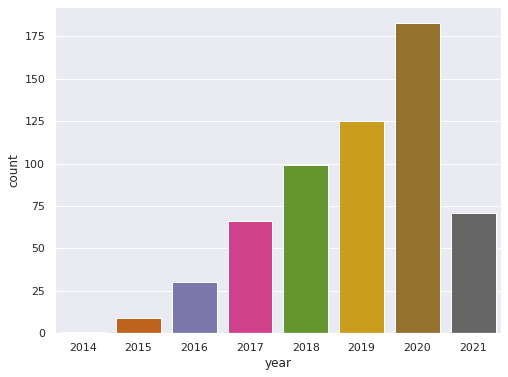

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='year',data=data,palette='Dark2') 
#2015 had second lowest amount of movies released

<AxesSubplot:xlabel='Runtime', ylabel='IMDB Score'>

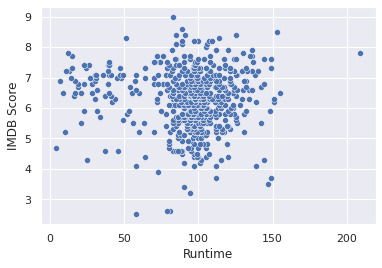

In [19]:
sns.scatterplot(x = 'Runtime' , y='IMDB Score' , data = data)
#majority IMDB scores come from 100 min of runtime

<AxesSubplot:xlabel='Runtime', ylabel='IMDB Score'>

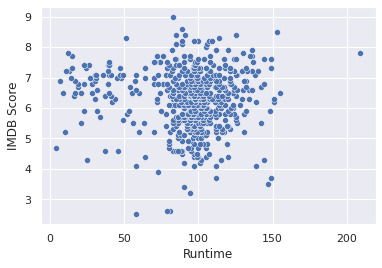

In [20]:
sns.scatterplot(x = 'Runtime' , y='IMDB Score' , data = data)
#majority IMDB scores come from 100 min of runtime

<AxesSubplot:xlabel='Genre', ylabel='Runtime'>

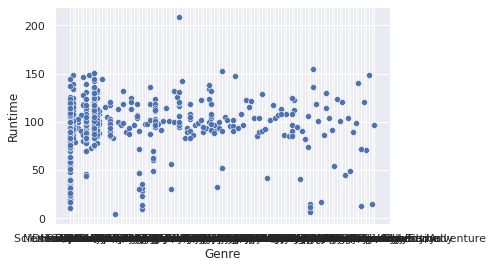

In [21]:
sns.scatterplot(x = 'Genre' , y='Runtime' , data = data , palette='Dark2')

In [22]:
data.groupby(by=["Genre"] , sort =True).sum()

,Runtime,IMDB Score,month,year,day,date_day
Genre,,,,,,
Action,756,37.9,42,14137,28,97
Action comedy,506,27.1,33,10092,19,48
Action thriller,82,6.4,10,2017,4,20
Action-adventure,121,7.3,6,2017,2,28
Action-thriller,359,18.4,20,6055,10,45
...,...,...,...,...,...,...
War,221,13.5,14,4033,8,28
War drama,291,14.2,16,4035,8,28
War-Comedy,122,6.0,5,2017,4,26


In [23]:
high_genre = data[data['IMDB Score']>7][['Genre','Title', 'IMDB Score']].sort_values('IMDB Score', ascending = True)

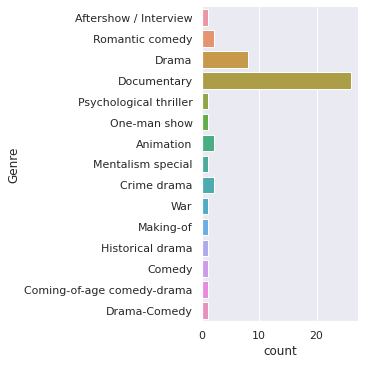

In [24]:
sns.catplot( y= 'Genre' , kind ='count', data = high_genre[:50])
#documentary has highest count in terms of genre 

<AxesSubplot:xlabel='IMDB Score', ylabel='Genre'>

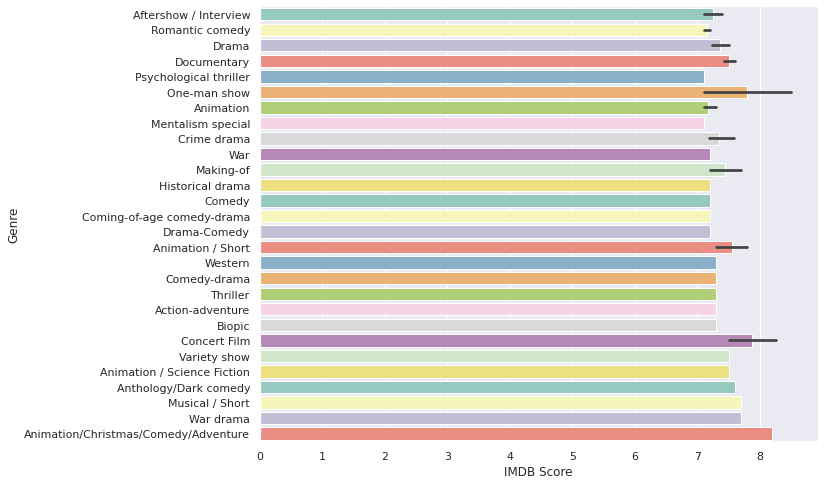

In [25]:
plt.figure(figsize=(10,8))
sns.barplot( y= 'Genre' , x = 'IMDB Score', data = high_genre , palette = 'Set3')
#Animation/christmas/comedy.adventure has seen highest IMDB score rating 

<AxesSubplot:>

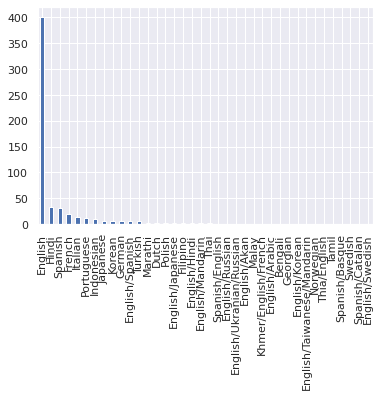

In [26]:
data['Language'].value_counts().plot(kind = 'bar')

In [27]:
data.Genre.value_counts()
#Documentary has hightest count but this count is based over the years , lets see whats based on 2020 

Documentary               159
Drama                      77
Comedy                     49
Romantic comedy            39
Thriller                   33
                         ... 
Science fiction/Action      1
Horror/Crime drama          1
Supernatural drama          1
Anime/Fantasy               1
Drama / Short               1
Name: Genre, Length: 115, dtype: int64

In [28]:
#year_genre = data[data['year']='2020' ]['Genre','Month', 'IMDB Score']
year_gen = data[data['year'] >2019]
year_gen

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,month_map,day of week
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21,Aug,Fri
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30,Oct,Fri
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish,12,2020,4,4,Dec,Fri
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English,6,2020,4,5,Jun,Fri
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi,5,2021,1,18,May,Tues
...,...,...,...,...,...,...,...,...,...,...,...,...
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English,3,2021,2,24,Mar,Wed
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish,10,2020,2,14,Oct,Wed
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,5,2020,2,20,May,Wed
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Dec,Tues


<Figure size 720x1440 with 0 Axes>

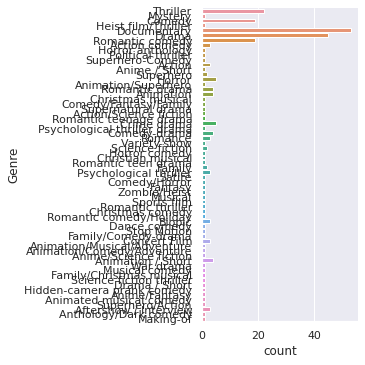

In [29]:
plt.figure(figsize=(10,20))
sns.catplot(y= 'Genre' , kind = 'count', data = year_gen )